In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
disease = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\data files\data december\Disease_symptom_and_patient_profile_dataset.csv")
disease.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [3]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
disease['Outcome Variable'].value_counts().to_frame()

,Outcome Variable
Positive,186
Negative,163


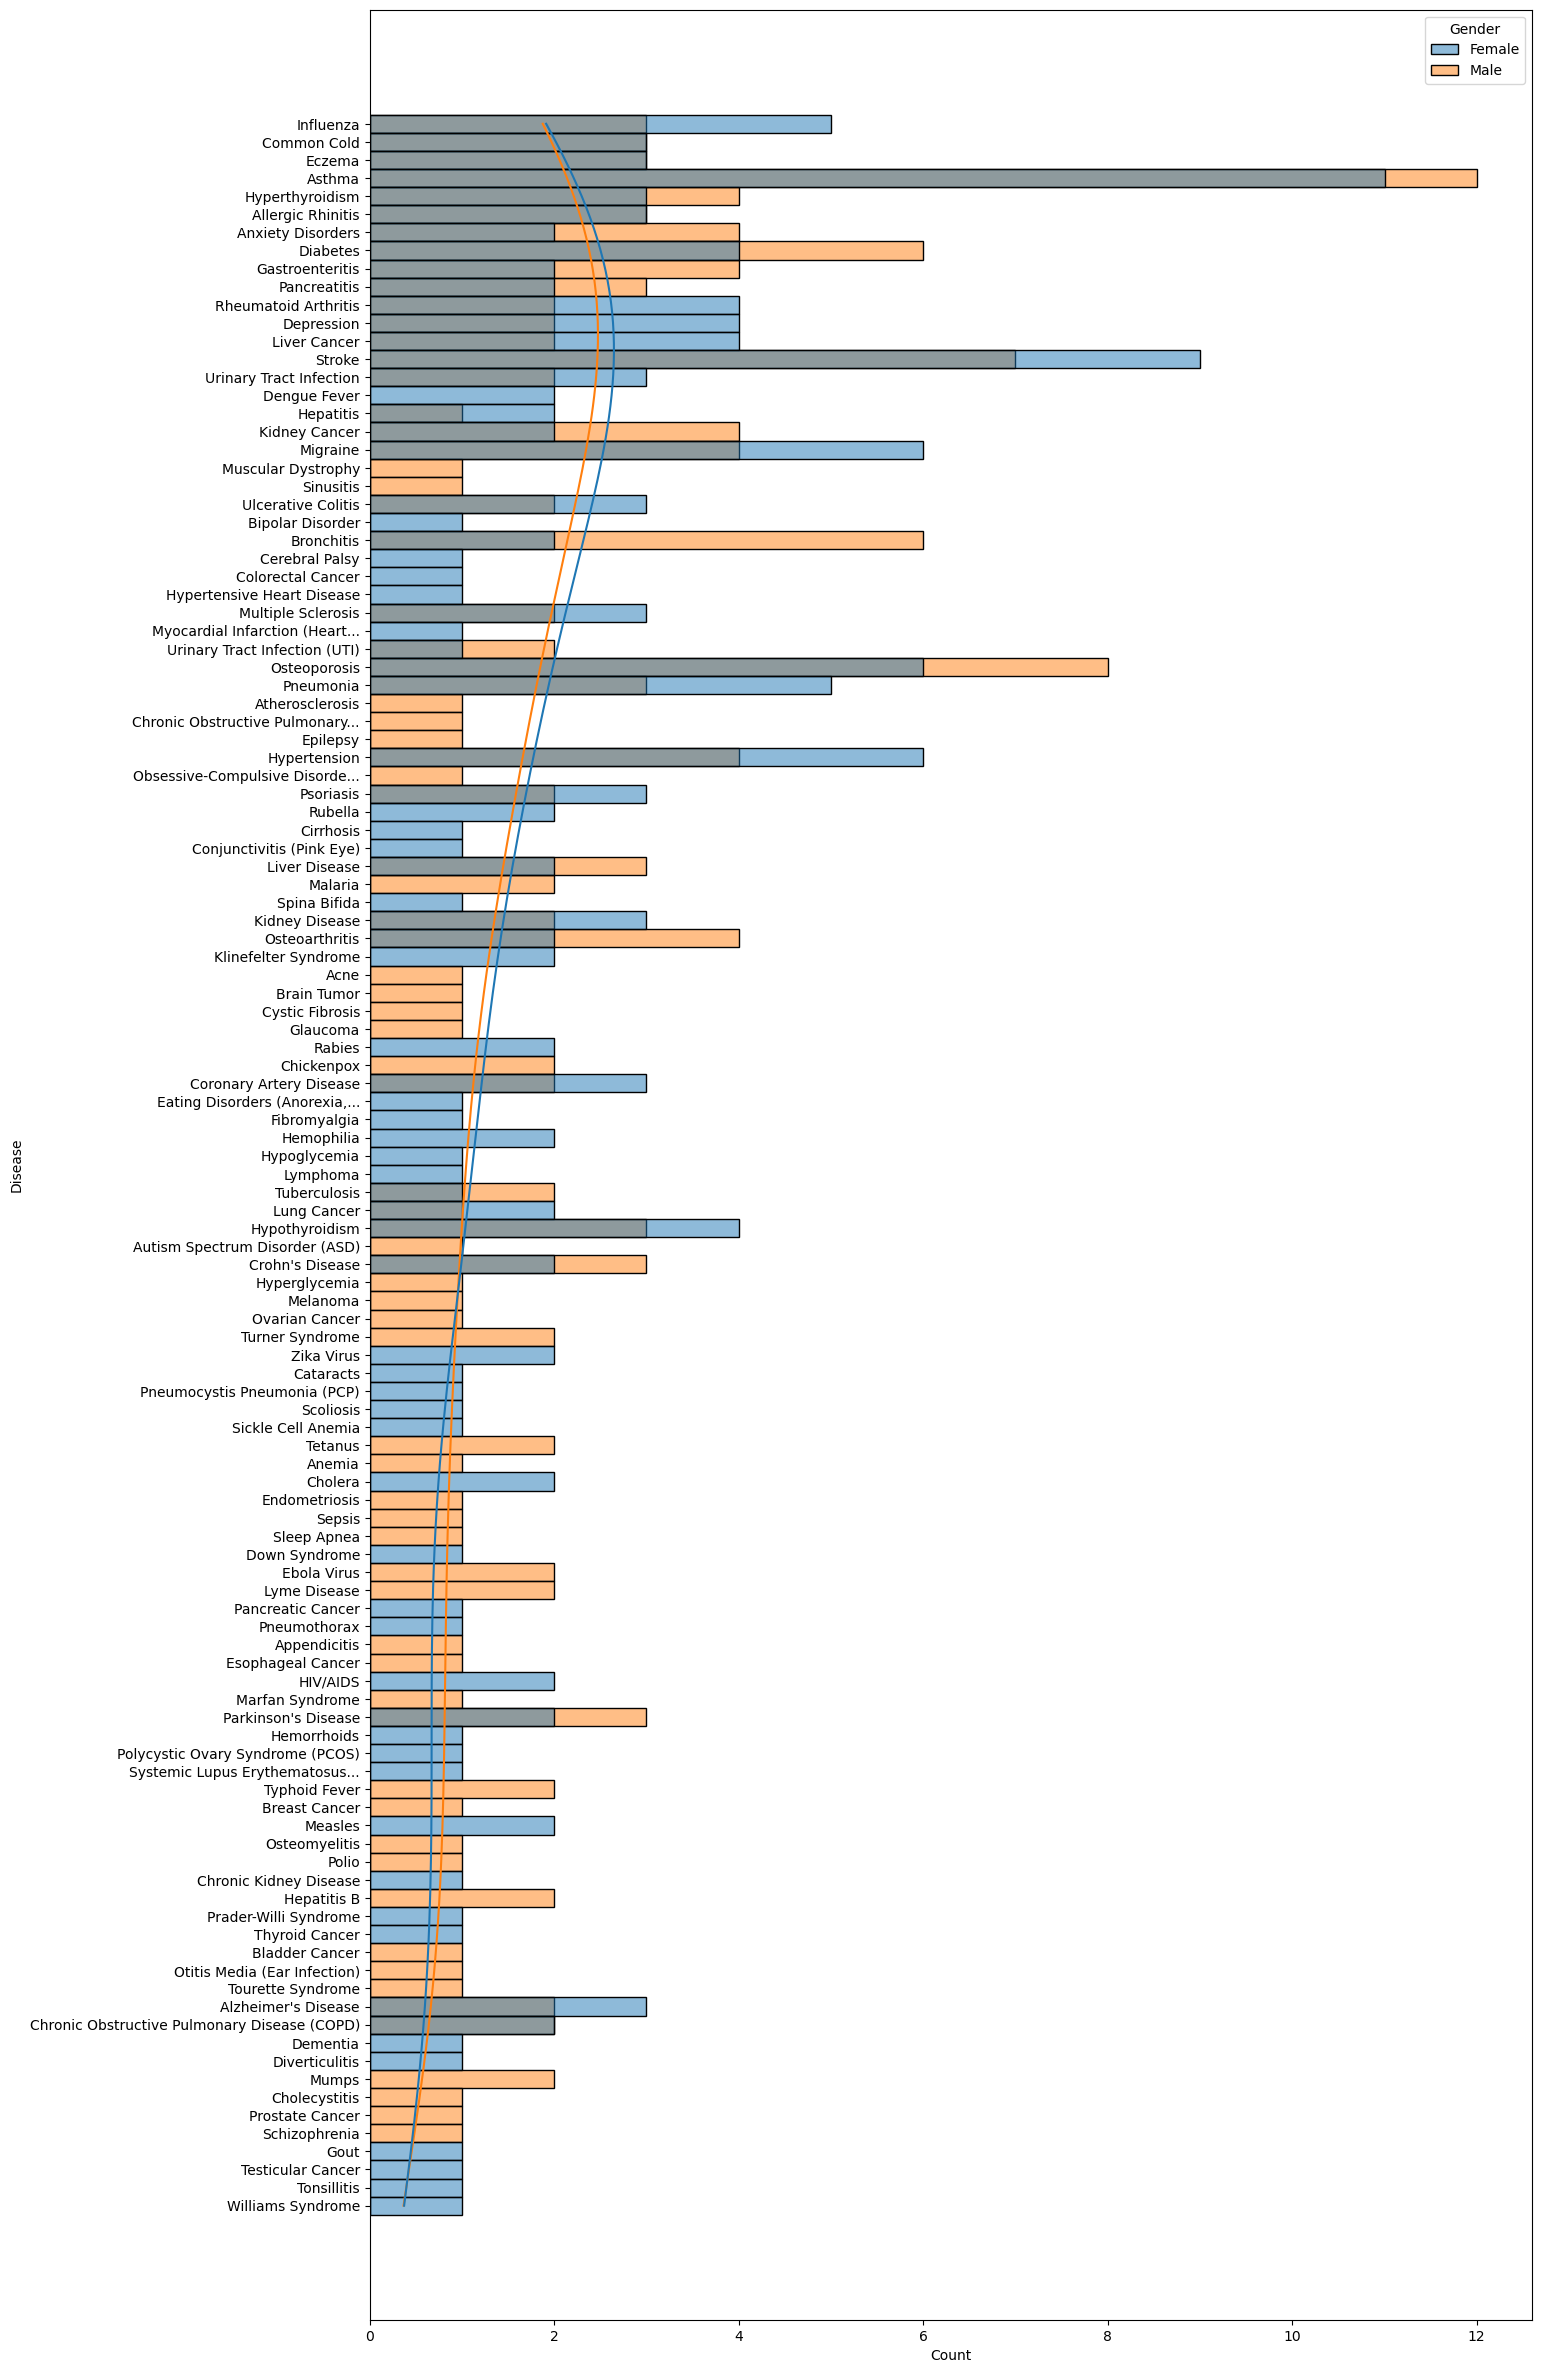

In [15]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.histplot(data = disease, y = "Disease", kde = True, hue = "Gender")
plt.show()


In [13]:
disease['Blood Pressure'].value_counts().to_frame()

,Blood Pressure
High,167
Normal,164
Low,18


In [14]:
positive = disease[disease['Outcome Variable'] == 'Positive']
positive


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


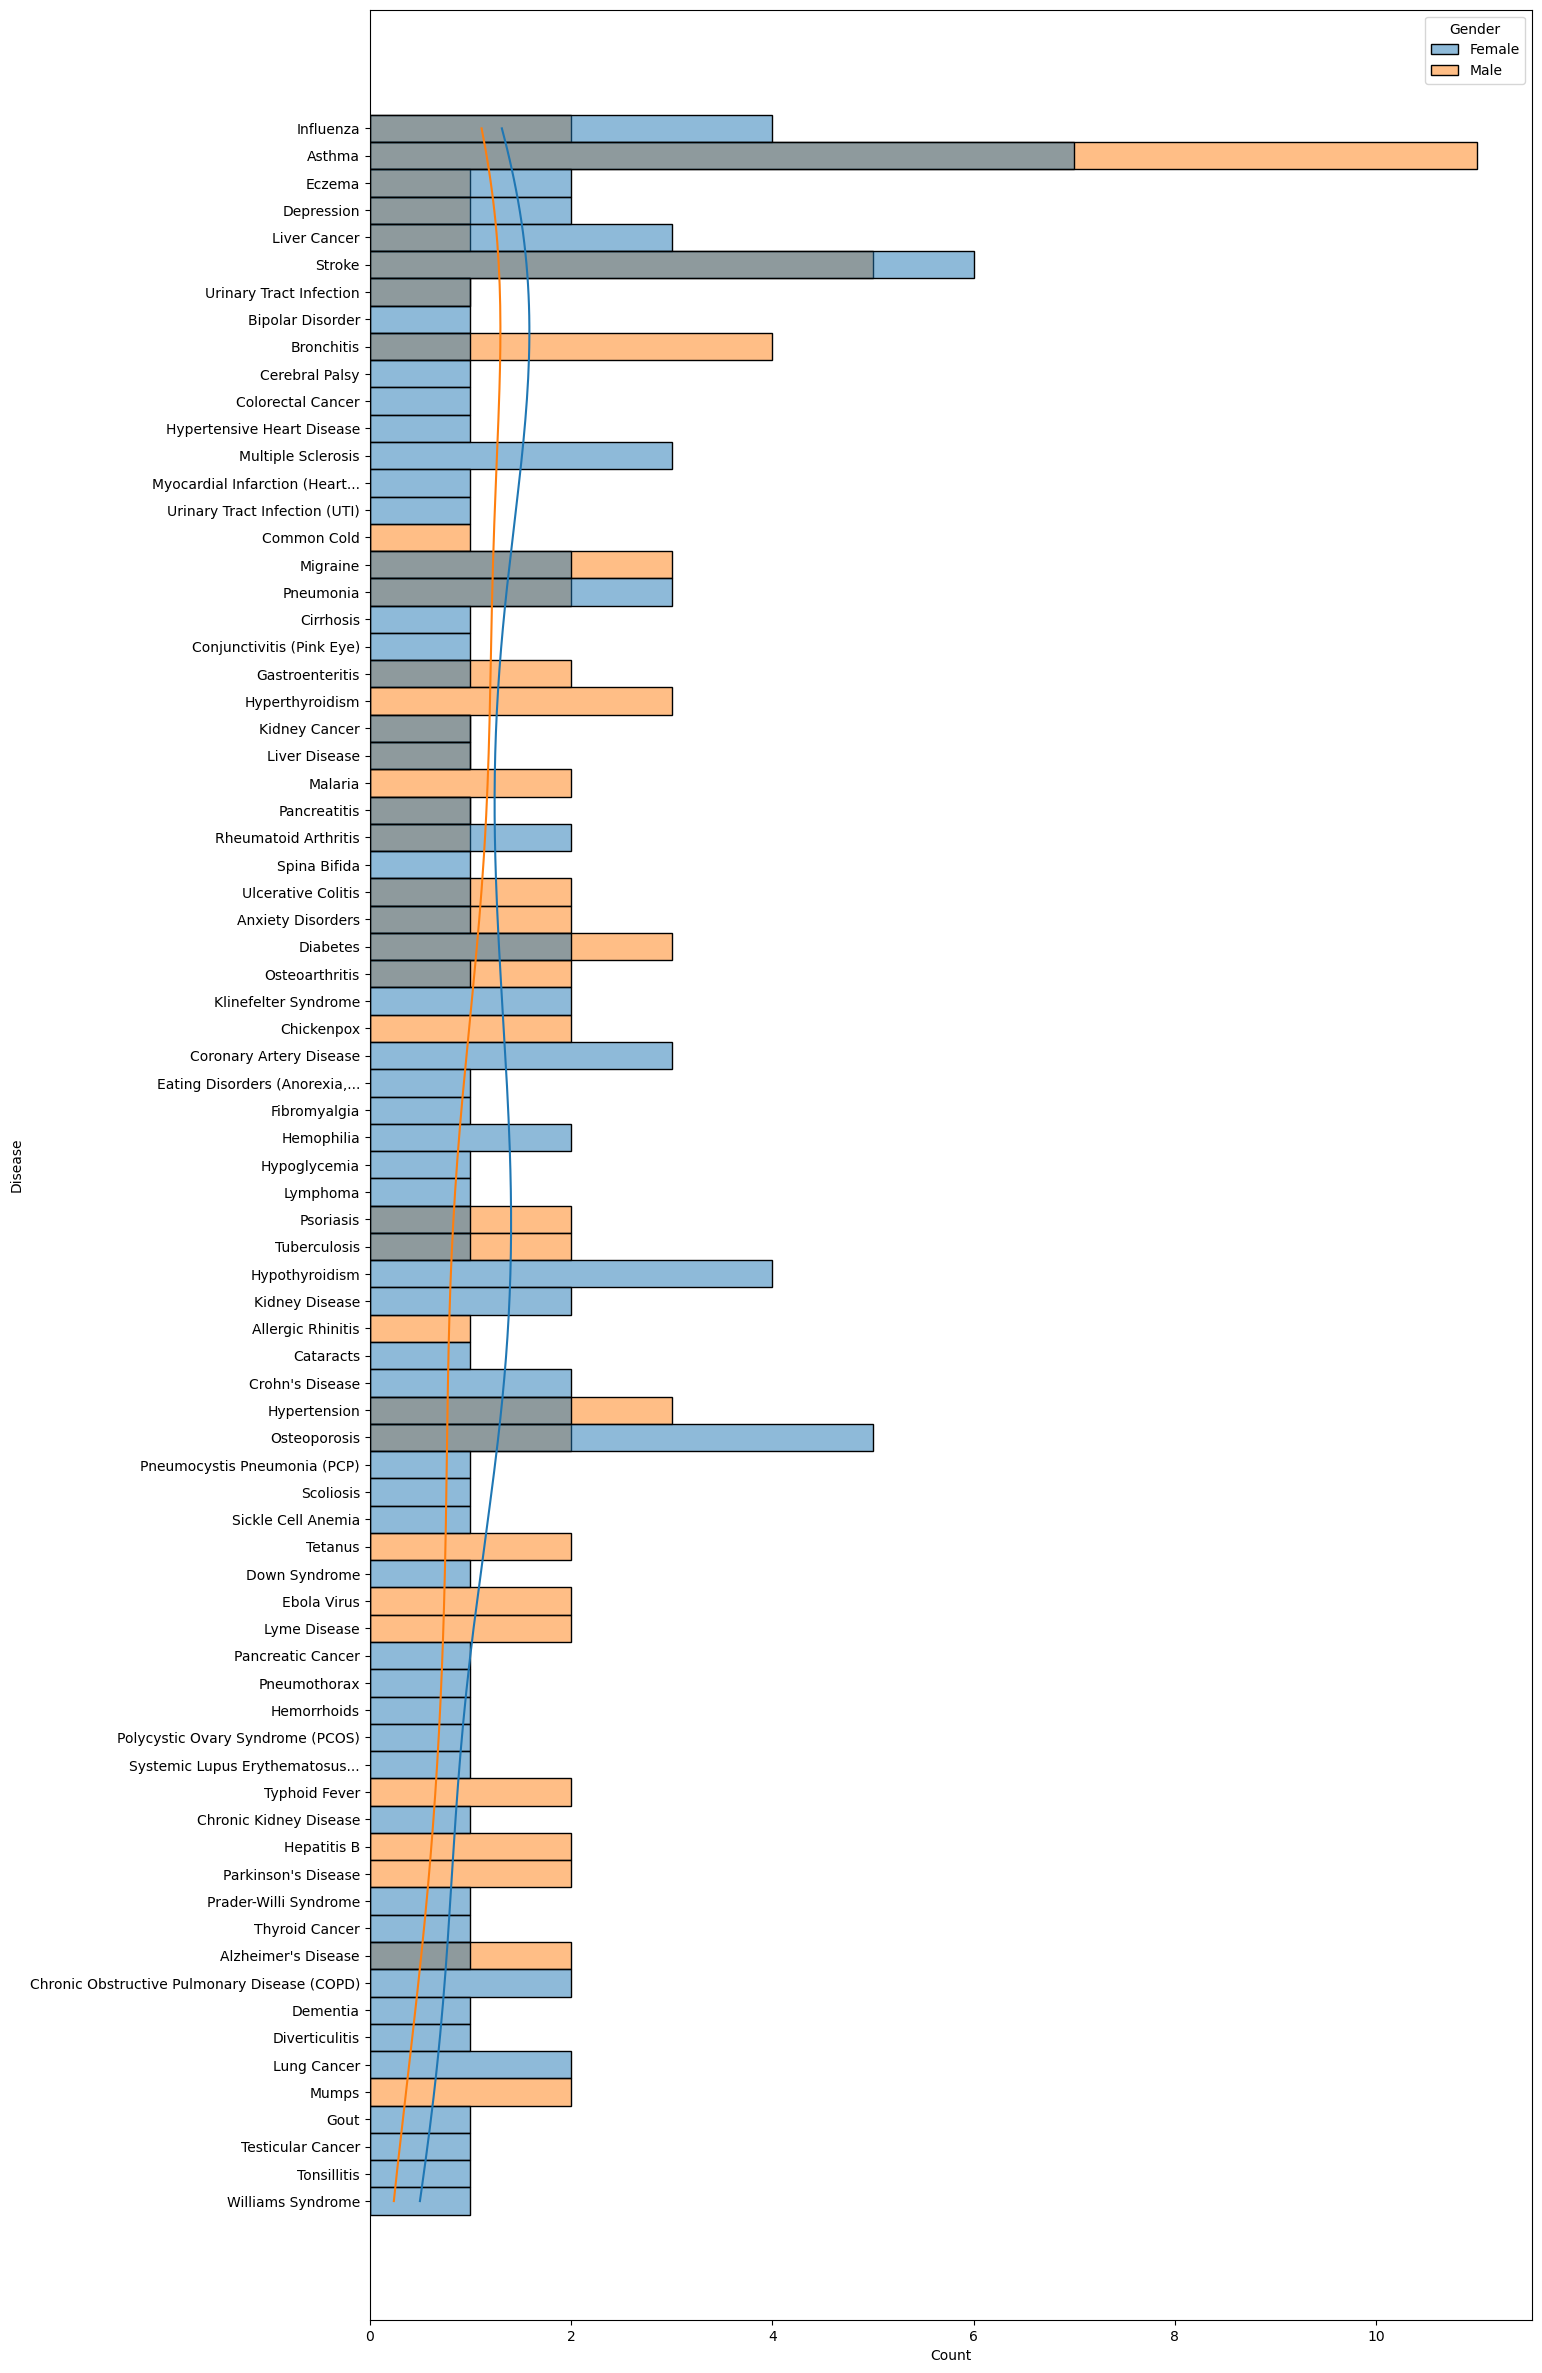

In [16]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.histplot(data = positive, y = "Disease", kde = True, hue = "Gender")
plt.show()

In [32]:
p = positive[['Disease', 'Cholesterol Level', 'Blood Pressure', 'Difficulty Breathing']]
result = p.groupby('Disease').agg({
    'Cholesterol Level': 'nunique',
    'Blood Pressure': 'nunique',
    'Difficulty Breathing': 'nunique'
}).reset_index()
result

,Disease,Cholesterol Level,Blood Pressure,Difficulty Breathing
0,Allergic Rhinitis,1,1,1
1,Alzheimer's Disease,1,2,1
2,Anxiety Disorders,3,2,2
3,Asthma,2,3,2
4,Bipolar Disorder,1,1,1
...,...,...,...,...
72,Typhoid Fever,1,1,1
73,Ulcerative Colitis,1,2,1
74,Urinary Tract Infection,1,2,1
75,Urinary Tract Infection (UTI),1,1,1


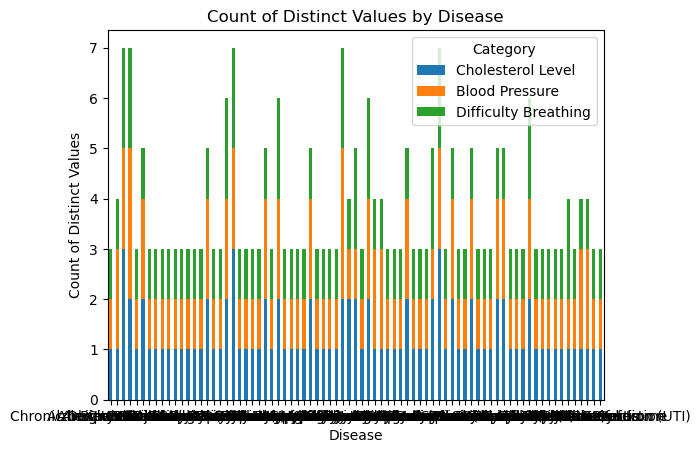

In [33]:
result.set_index('Disease', inplace=True)

# Plotting
result.plot(kind='bar', rot=0, stacked=True)

# Adding legends
plt.legend(title='Category')

# Adding labels and title
plt.xlabel('Disease')
plt.ylabel('Count of Distinct Values')
plt.title('Count of Distinct Values by Disease')

# Show the plot
plt.show()